The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service ([EMIS](https://www.emis.com)), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
datasetLink:"https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data"

In [1]:
#importing libraries 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [118]:
#the data was in arff file formate,so i used scipy library to read it 
from scipy.io import arff
data = arff.loadarff('../data (1)/3year.arff')
df = pd.DataFrame(data[0])

In [119]:
df.shape

(10503, 65)

In [120]:
df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

In [121]:
df=df.rename({"class":"bankrupt"},axis = 1 )


In [122]:
df.columns[-1]

'bankrupt'

In [123]:
df.head(3)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'


In [124]:
# setting the index name as company_id 
df.index.name = "company_id"
df.head(2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.17419,0.41299,0.14371,1.3480,-28.9820,0.60383,0.21946,1.1225,1.1961,0.46359,...,0.163960,0.37574,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.14624,0.46038,0.28230,1.6294,2.5952,0.00000,0.17185,1.1721,1.6018,0.53962,...,0.027516,0.27100,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'


In [125]:
df["bankrupt"].value_counts()

b'0'    10008
b'1'      495
Name: bankrupt, dtype: int64

<AxesSubplot:title={'center':'data_balance'}, xlabel='class', ylabel='frequency'>

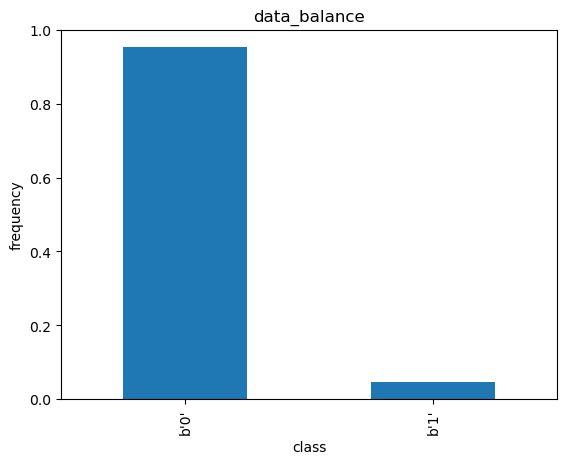

In [126]:
#visualizing the data class imbalance
(df["bankrupt"].value_counts(normalize=True)
 .plot(kind="bar",xlabel="class",ylabel="frequency",title="data_balance"))

In [127]:
# encoding the labels to [0] and [1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["bankrupt"] = le.fit_transform(df.bankrupt)

In [128]:
df.head(2)
#noticing that (0) means (not_bankrupted) , and (1) means (bankrupted)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.17419,0.41299,0.14371,1.3480,-28.9820,0.60383,0.21946,1.1225,1.1961,0.46359,...,0.163960,0.37574,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.14624,0.46038,0.28230,1.6294,2.5952,0.00000,0.17185,1.1721,1.6018,0.53962,...,0.027516,0.27100,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0


## checking corrolated features and deleting it 

In [129]:
#find the corrolated features (corrolation more than .98)
corr_matrix=df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
print(to_drop)

['Attr3', 'Attr7', 'Attr10', 'Attr11', 'Attr14', 'Attr17', 'Attr23', 'Attr25', 'Attr26', 'Attr38', 'Attr46', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr54', 'Attr58', 'Attr62']


In [130]:
# another function to find the corrolation (this is for my reference )
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
    return col_corr   
col_corr=correlation(df,.99)

In [131]:
col_corr

['Attr7',
 'Attr10',
 'Attr14',
 'Attr14',
 'Attr17',
 'Attr23',
 'Attr25',
 'Attr26',
 'Attr38',
 'Attr46',
 'Attr49',
 'Attr50',
 'Attr51',
 'Attr52',
 'Attr54',
 'Attr62']

In [132]:
df = df.drop(columns=col_corr)
df.shape

(10503, 50)

## checking features normality and removing outliers 

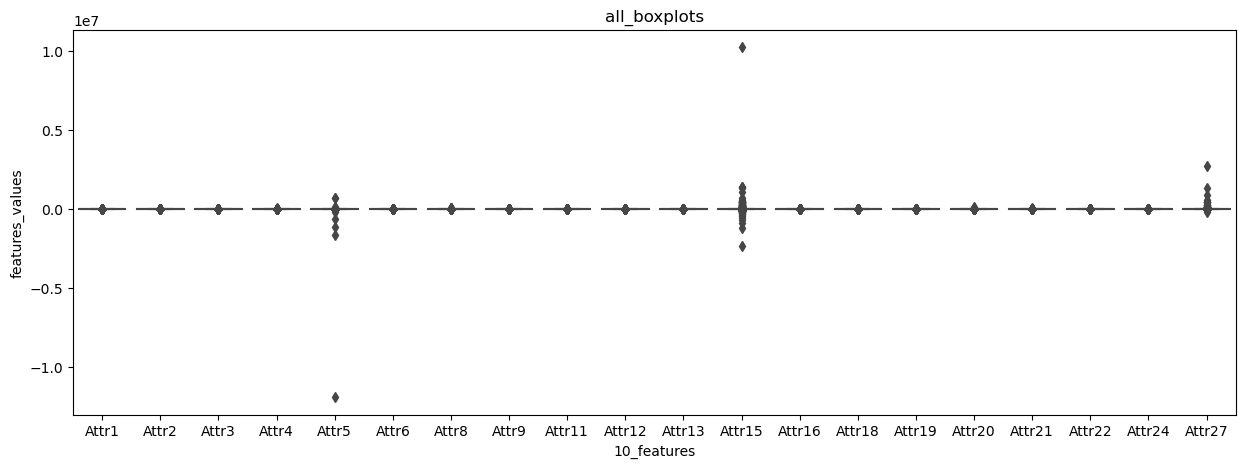

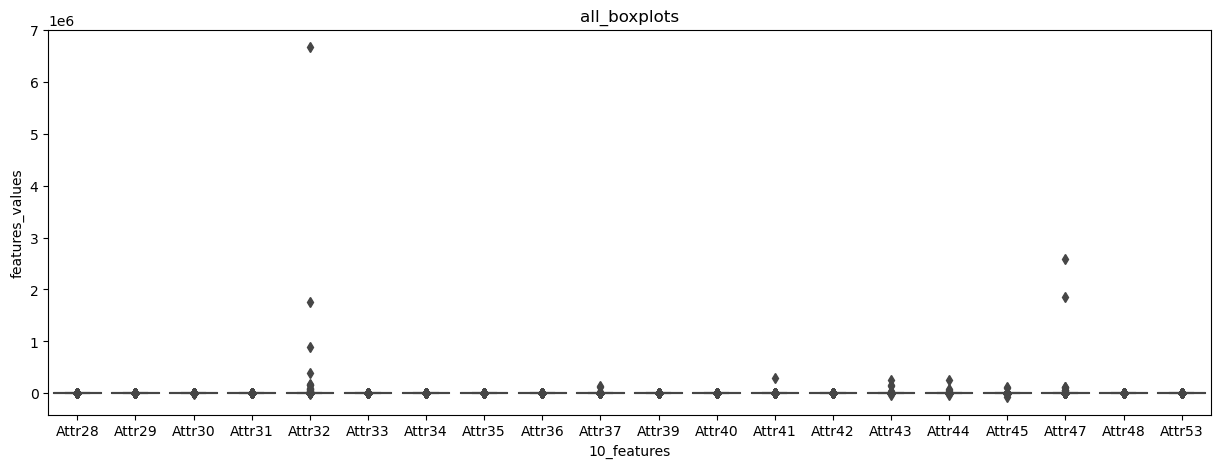

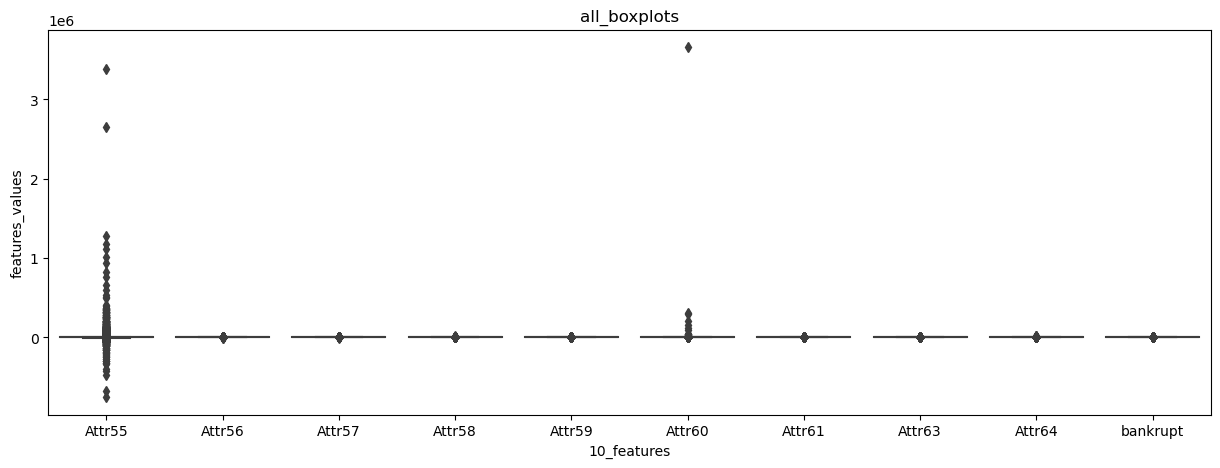

In [133]:
# Create boxplot for all data 
 
j=0    
while j<=len(df.columns):
    features_group=list(df.columns[j:j+20])
    j+=20
    plt.figure(figsize=(15,5))
    sns.boxplot(data=df[features_group])
    plt.xlabel("10_features")
    plt.ylabel("features_values")
    plt.title("all_boxplots")
    plt.show();

boxblots shows that there is many features with many outliers (this observation needs more invistigation )

In [134]:
df_std=df.describe().T["std"].sort_values()

In [135]:
unusual_std=df_std[df_std>10]
unusual_std

Attr42        10.787555
Attr31        11.157003
Attr19        11.210201
Attr57        18.684047
Attr63        31.419096
Attr33        37.696764
Attr40        37.819839
Attr13        49.675550
Attr56        55.978608
Attr34        69.035263
Attr30        71.755042
Attr59        77.273270
Attr61        83.704103
Attr53        89.708042
Attr28        94.713753
Attr16       110.233475
Attr12       111.459642
Attr58       190.201224
Attr21       305.897238
Attr64       428.298315
Attr4        523.691951
Attr8        717.756745
Attr20      1083.699904
Attr45      1720.342176
Attr37      2469.447679
Attr44      2766.505503
Attr41      2845.290346
Attr43      3303.309554
Attr47     31264.160236
Attr27     34691.229230
Attr60     37159.672255
Attr55     59891.957972
Attr32     68412.702913
Attr15    109198.119626
Attr5     118580.569222
Name: std, dtype: float64

#### as shown in the previous boxplots ,many features has unusual standard variation , which may indicate outliers in the data 


## deleting outliers 

In [137]:
def find_outliers_IQR(df):

    q1=df.quantile(0.1)

    q3=df.quantile(0.9)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [138]:
for i in df.columns.to_list()[:-1]:
    
    index = find_outliers_IQR(df[i]).index
    df.drop(index,axis=0,inplace=True)
    print(df.shape)

(10321, 50)
(10249, 50)
(10244, 50)
(9939, 50)
(9311, 50)
(9148, 50)
(8983, 50)
(8881, 50)
(8861, 50)
(8684, 50)
(8512, 50)
(8073, 50)
(8015, 50)
(8010, 50)
(7965, 50)
(7910, 50)
(7837, 50)
(7817, 50)
(7788, 50)
(7245, 50)
(6918, 50)
(6918, 50)
(6854, 50)
(6828, 50)
(6778, 50)
(6714, 50)
(6671, 50)
(6658, 50)
(6645, 50)
(6397, 50)
(6358, 50)
(6206, 50)
(5832, 50)
(5796, 50)
(5781, 50)
(5756, 50)
(5506, 50)
(5484, 50)
(5466, 50)
(5348, 50)
(5086, 50)
(5049, 50)
(4869, 50)
(4850, 50)
(4707, 50)
(4605, 50)
(4495, 50)
(4489, 50)
(4388, 50)


In [139]:
df_std=df.describe().T["std"].sort_values()
unusual_std=df_std[df_std>10]
unusual_std

Attr60      11.104553
Attr37      16.507726
Attr44      32.749002
Attr20      38.086146
Attr47      41.422172
Attr43      50.929354
Attr32      55.953987
Attr5       82.566080
Attr15    2388.202101
Attr55    8061.382271
Name: std, dtype: float64

In [146]:
#checking the corrolation between the features and the target 
sum(pd.DataFrame(df.corr())["bankrupt"].abs().sort_values()>.7)

1

there is no corrolation between any feature and the target 

## Split the data 

In [27]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

## oversampling

In [147]:
#checking again for data balance 
df["bankrupt"].value_counts()


0    4222
1     166
Name: bankrupt, dtype: int64

In [30]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(6748, 49)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr8,Attr9,Attr11,Attr12,...,Attr53,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64
0,0.003840,0.62783,0.113260,1.19970,-74.437,0.003840,0.58625,0.95419,0.008917,0.015724,...,1.15160,5983.0,-0.048013,0.010434,1.04800,0.16494,3.2544,3.2163,1.9175,3.4024
1,0.125370,0.41680,0.378550,2.13400,36.880,0.331850,1.39210,1.09200,0.158050,0.473460,...,2.01740,15551.0,0.084267,0.216070,0.91573,0.14299,9.8809,5.2547,5.8314,6.7683
2,0.128570,0.45265,0.157800,1.60700,43.529,0.339030,1.20060,1.15800,0.128610,0.494740,...,0.93337,3301.8,0.136470,0.236590,0.86353,0.35457,19.5390,2.9232,3.9779,1.7761
3,0.021756,0.83567,-0.017917,0.97856,-37.174,0.021756,0.18960,1.00820,0.025842,0.030923,...,0.87004,-134.0,0.008175,0.137310,0.99183,0.00000,10.4000,7.2420,3.7971,17.4240
4,0.313660,0.35685,0.291040,2.18010,41.610,0.630640,1.80230,1.33220,0.315490,1.279200,...,1.39110,23404.0,0.249350,0.487690,0.75065,0.17138,14.9220,6.7067,7.7155,4.1159


In [148]:
# deciding a baseline for the result ( this is based on the distribution 
#of the positive and negatibe labels in the target features)
acc_baseline = y_train_over.value_counts(normalize=True).max()
acc_baseline

0.5

## Decision Tree Model

First model ( Decision Tree , No over_sampling )

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model_reg = make_pipeline(SimpleImputer(strategy="median"),StandardScaler(),DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Second model (Decision Tree , and Over_sampling )

In [34]:
DT_model_over = make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42))
DT_model_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [35]:
depth = DT_model_over.named_steps["decisiontreeclassifier"].get_depth()
depth

28

In [36]:
for m in [model_reg, DT_model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)
    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9544
Training Accuracy: 1.0
Test Accuracy: 0.967


#### very good accuracy for both models, but accuracy alone is not enough to judge the model , next I will calculate f1_score , recall , precesion

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,DT_model_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       848
           1       0.52      0.53      0.52        30

    accuracy                           0.97       878
   macro avg       0.75      0.76      0.75       878
weighted avg       0.97      0.97      0.97       878



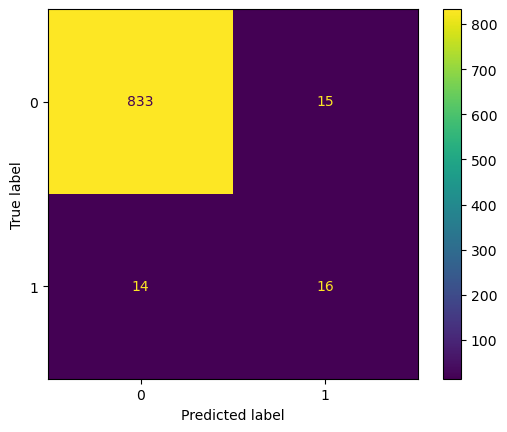

In [39]:
ConfusionMatrixDisplay.from_estimator(DT_model_over,X_test,y_test)

although the model accuracy is high , but the recall is not very good  

Visualizing Decision Tree Results


In [41]:
importances = DT_model_over.named_steps["decisiontreeclassifier"].feature_importances_
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values(ascending=True)[-15:]

In [42]:
feat_imp

Attr19    0.019746
Attr58    0.020095
Attr2     0.020905
Attr37    0.021405
Attr36    0.022150
Attr21    0.022563
Attr39    0.026057
Attr5     0.028291
Attr16    0.031618
Attr42    0.048423
Attr6     0.053572
Attr29    0.059447
Attr27    0.092224
Attr34    0.114850
Attr24    0.208915
dtype: float64

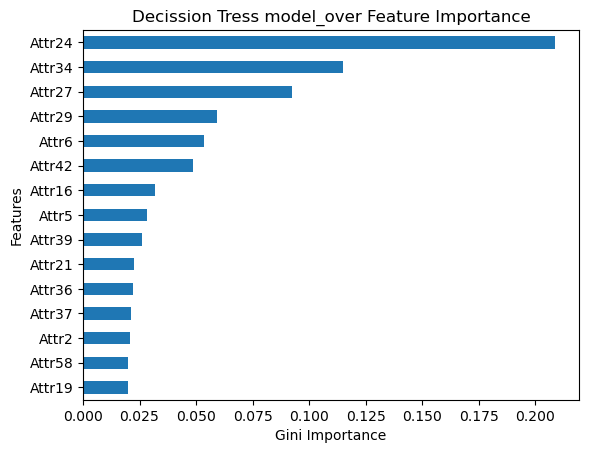

In [43]:
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Decission Tress model_over Feature Importance");

In [44]:
import pickle
with open ("model-1.pkl","wb")as f:
    pickle.dump(DT_model_over,f)

In [45]:
with open("model-1.pkl", "rb") as f:
    loaded_model = pickle.load(f)

## Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf = make_pipeline(SimpleImputer(),StandardScaler(),RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


Doing cross_validation to check the possible results of that model 

In [48]:
cv_acc_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_acc_scores)

[0.99777778 0.99851852 0.99851852 0.99925871 1.        ]


Deciding the ranges of the hyperparameters 

In [49]:
params = {"simpleimputer__strategy":["mean","median"],
          "randomforestclassifier__n_estimators":range(25,100,25),
          "randomforestclassifier__max_depth":range(10,50,10)}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [50]:
RF_model = GridSearchCV(clf,param_grid=params,cv=3,n_jobs=-1,verbose=1)
RF_model

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [51]:
RF_model.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [52]:
cv_results = pd.DataFrame(RF_model.cv_results_)
cv_results.head(2)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.394028,0.010232,0.014669,0.000471,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.986667,0.987995,0.984882,0.986515,0.001275,24
1,0.425362,0.003682,0.015002,0.000817,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.986667,0.986216,0.987105,0.986663,0.000363,23


In [53]:
RF_model.best_params_,RF_model.best_score_

({'randomforestclassifier__max_depth': 20,
  'randomforestclassifier__n_estimators': 50,
  'simpleimputer__strategy': 'mean'},
 0.9985181232811291)

so the best model depth is 40 and n_estimators = 75 , and the imputer strategy should be the median 

In [54]:
acc_train = RF_model.score(X_train,y_train)
acc_test = RF_model.score(X_test,y_test)
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9795


In [55]:
print(classification_report(y_test,RF_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       848
           1       0.93      0.43      0.59        30

    accuracy                           0.98       878
   macro avg       0.95      0.72      0.79       878
weighted avg       0.98      0.98      0.98       878



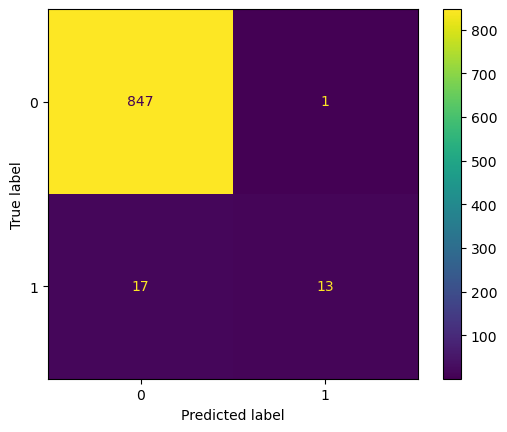

In [56]:
ConfusionMatrixDisplay.from_estimator(RF_model,X_test,y_test)

A better model in terms of negative label precession

## Gradient Boosting Classifier Model

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
clf = make_pipeline(SimpleImputer(),StandardScaler(),GradientBoostingClassifier())

In [59]:
params = {"simpleimputer__strategy":["mean","median"],"gradientboostingclassifier__max_depth":range(2,5),"gradientboostingclassifier__n_estimators":range(20,31,5)}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__max_depth': range(2, 5),
 'gradientboostingclassifier__n_estimators': range(20, 31, 5)}

In [60]:
GBC_model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [61]:
GBC_model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [62]:
results = pd.DataFrame(GBC_model.cv_results_)
results.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,3.014022,0.286876,0.005801,0.001600,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.960741,0.954074,0.951111,0.951816,0.962936,0.956136,0.004808,1
17,2.700199,0.015403,0.005200,0.000399,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.955556,0.954074,0.946667,0.947368,0.951075,0.950948,0.003526,2
14,2.200962,0.012074,0.005200,0.000400,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.955556,0.953333,0.941481,0.945886,0.955523,0.950356,0.005680,3
15,2.246172,0.009280,0.005000,0.000633,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.946667,0.945185,0.936296,0.938473,0.951075,0.943539,0.005430,4
12,1.765928,0.013674,0.004401,0.000490,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.935556,0.938519,0.921481,0.925130,0.931060,0.930349,0.006328,5


In [63]:
GBC_model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

In [64]:
print(classification_report(y_test,GBC_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       848
           1       0.26      0.77      0.39        30

    accuracy                           0.92       878
   macro avg       0.63      0.85      0.67       878
weighted avg       0.97      0.92      0.94       878



improving the model recall , very good!

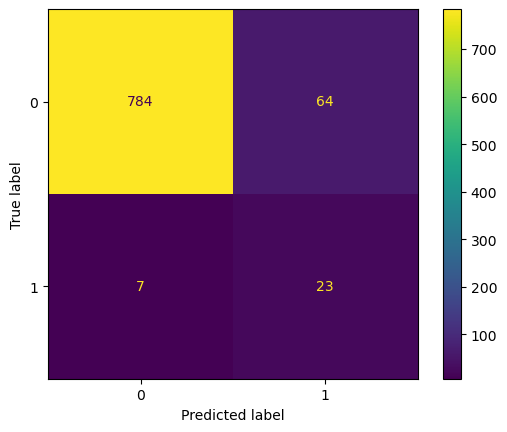

In [65]:
ConfusionMatrixDisplay.from_estimator(GBC_model,X_test,y_test)

better performance on the positive labels , but the precesion is low 

## Logistic Regression Model

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
clf = make_pipeline(SimpleImputer(),StandardScaler(),LogisticRegression(random_state=42,max_iter=500))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])


In [68]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [69]:
pd.DataFrame(clf.get_params())

,memory,steps,verbose,simpleimputer,standardscaler,logisticregression,simpleimputer__add_indicator,simpleimputer__copy,simpleimputer__fill_value,simpleimputer__missing_values,...,logisticregression__l1_ratio,logisticregression__max_iter,logisticregression__multi_class,logisticregression__n_jobs,logisticregression__penalty,logisticregression__random_state,logisticregression__solver,logisticregression__tol,logisticregression__verbose,logisticregression__warm_start
0,None,"(simpleimputer, SimpleImputer())",False,SimpleImputer(),StandardScaler(),"LogisticRegression(max_iter=500, random_state=42)",False,True,None,NaN,...,None,500,auto,None,l2,42,lbfgs,0.0001,0,False
1,None,"(standardscaler, StandardScaler())",False,SimpleImputer(),StandardScaler(),"LogisticRegression(max_iter=500, random_state=42)",False,True,None,NaN,...,None,500,auto,None,l2,42,lbfgs,0.0001,0,False
2,None,"(logisticregression, LogisticRegression(max_it...",False,SimpleImputer(),StandardScaler(),"LogisticRegression(max_iter=500, random_state=42)",False,True,None,NaN,...,None,500,auto,None,l2,42,lbfgs,0.0001,0,False


In [70]:
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'logisticregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [71]:
params = {"simpleimputer__strategy":["mean","median"],
          "logisticregression__penalty":['l1', 'l2'],
          "logisticregression__multi_class":['ovr', 'multinomial'],
          'logisticregression__C':[.1,.3,.6,.9],
          'logisticregression__solver':[ 'lbfgs',  'saga']}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'logisticregression__penalty': ['l1', 'l2'],
 'logisticregression__multi_class': ['ovr', 'multinomial'],
 'logisticregression__C': [0.1, 0.3, 0.6, 0.9],
 'logisticregression__solver': ['lbfgs', 'saga']}

In [72]:
LR_model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [73]:
LR_model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, sel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 0.3, 0.6, 0.9],
                         'logisticregression__multi_class': ['ovr',
                                                             'multinomial'],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['lbfgs', 'saga'],
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [74]:
LR_model.best_params_

{'logisticregression__C': 0.6,
 'logisticregression__multi_class': 'multinomial',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'saga',
 'simpleimputer__strategy': 'mean'}

In [75]:
print(classification_report(y_test,LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.77      0.87       848
           1       0.08      0.57      0.14        30

    accuracy                           0.77       878
   macro avg       0.53      0.67      0.50       878
weighted avg       0.95      0.77      0.84       878



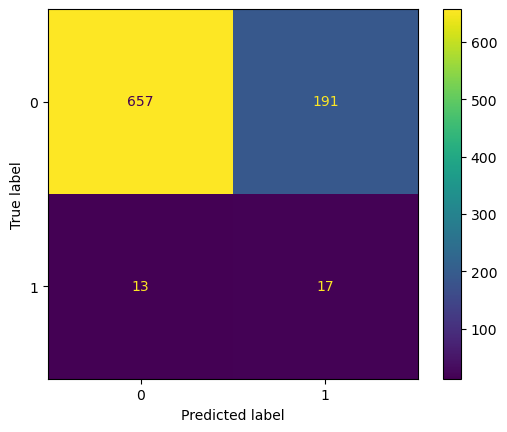

In [76]:
ConfusionMatrixDisplay.from_estimator(LR_model,X_test,y_test)

accuracy is low , recall is low for both (negative and positive labels)

## A Function to control the threshhold probabilitly of deciding the label prediction

In [77]:
import ipywidgets as widgets
from ipywidgets import interact

In [151]:
def make_cnf_matrix(threshold):
    y_pred_proba=RF_model.predict_proba(X_test)[:,-1]
    y_pred=y_pred_proba>threshold
    conf_matrix=confusion_matrix(y_test,y_pred)
    tn,fp,fn,tp=conf_matrix.ravel()
    print(f"false positive {fp}")
    print(f"false negative {fn}")
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)
    print(classification_report(y_test,y_pred))
   


thresh_widget = widgets.FloatSlider(min=0,max=1,value=.5,step=.05)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

# Test logisticregression model, and gradient boosting model on new dataset 

In [80]:
test_data = arff.loadarff('../data (1)/2year.arff')
test_df = pd.DataFrame(test_data[0])

In [81]:
test_df.shape

(10173, 65)

In [82]:
test_df=test_df.rename({"class":"bankrupt"},axis = 1 )

In [83]:
test_df["bankrupt"] = le.fit_transform(test_df.bankrupt)

In [84]:
test_df = test_df.drop(columns=col_corr)
test_df.shape

(10173, 50)

In [85]:
target = "bankrupt"
final_x_test = test_df.drop(columns=target)
final_y_test = test_df[target]

###  Testing Logistic regresion 

In [153]:
def make_cnf_matrix(threshold):
    y_pred_proba=RF_model.predict_proba(final_x_test)[:,-1]
    y_pred=y_pred_proba>threshold
    conf_matrix=confusion_matrix(final_y_test,y_pred)
    tn,fp,fn,tp=conf_matrix.ravel()
    print(f"false positive {fp}")
    print(f"false negative {fn}")
    ConfusionMatrixDisplay.from_predictions(final_y_test,y_pred,colorbar=False)
    print(classification_report(final_y_test,y_pred))
    
   


thresh_widget = widgets.FloatSlider(min=0,max=1,value=.5,step=.05)

interact(make_cnf_matrix, threshold=thresh_widget);


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

In [152]:
def make_cnf_matrix(threshold):
    y_pred_proba=GBC_model.predict_proba(final_x_test)[:,-1]
    y_pred=y_pred_proba>threshold
    conf_matrix=confusion_matrix(final_y_test,y_pred)
    tn,fp,fn,tp=conf_matrix.ravel()
    print(f"false positive {fp}")
    print(f"false negative {fn}")
    ConfusionMatrixDisplay.from_predictions(final_y_test,y_pred,colorbar=False)
    print(classification_report(final_y_test,y_pred))
    
   


thresh_widget = widgets.FloatSlider(min=0,max=1,value=.5,step=.05)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…